2. 과제

- 'Student_Performance.csv'를 이용해 다중선형회귀분석을 진행하세요!

In [2]:
# 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Student_Performance.csv', index_col = 0)
data.head()

Mounted at /content/drive/


,Study_Hours,Prev_Scores,Sleep_Hours,Sample_Practice,PI,Extracurriculars
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


2.1. 반응변수를 PI로 하고, 설명변수들을 그 외 모든 변수로 설정한 다중선형회귀분석을 진행하고 summary를 print하세요.

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#1 - formula 명시하지 않는 방법
Y = data.iloc[:, -1]  # 반응 변수를 설정, 마지막 열을 선택
X = data.iloc[:, :-1]  # 설명 변수를 설정, 마지막 열을 제외한 모든 열 선택
X = sm.add_constant(X)  # 상수 열을 설명 변수에 추가

model = sm.OLS(Y, X)  # 다중선형회귀 모델 생성
res = model.fit()  # 모델 적합

print(res.summary())  # 모델 요약 출력

                            OLS Regression Results                            
Dep. Variable:       Extracurriculars   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     46.81
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           5.34e-48
Time:                        16:32:39   Log-Likelihood:                -7141.6
No. Observations:               10000   AIC:                         1.430e+04
Df Residuals:                    9994   BIC:                         1.434e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7264      0.087     

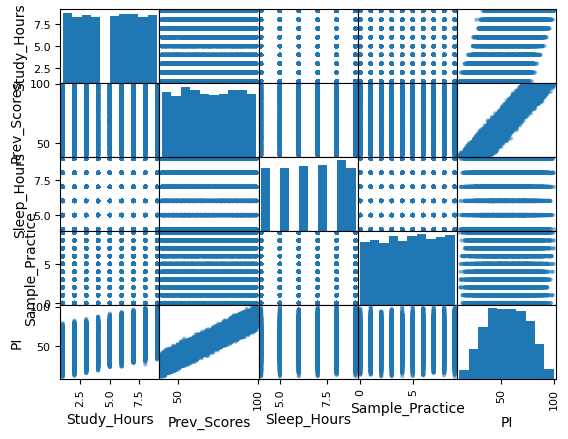

In [8]:
# 산점도 행렬 그리기 - 다중공선성 확인
X_ = X.iloc[:, 1:]
pd.plotting.scatter_matrix(X_)
plt.show()

2.2. 반응변수를 PI로 하고, 설명변수들을 Study_Hours로 설정한 단순선형회귀분석을 진행하고 summary를 print하세요.

In [9]:
Y = data['PI']  # 반응 변수를 'PI'로 설정
X = data['Study_Hours']  # 설명 변수를 'Study_Hours'로 설정
X = sm.add_constant(X)  # 상수 열을 설명 변수에 추가

model = sm.OLS(Y, X)  # 단순선형회귀 모델 생성
res2 = model.fit()  # 모델 적합

print(res2.summary())  # 회귀분석 결과 출력

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:37:01   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          41.3792      0.387    106.890      

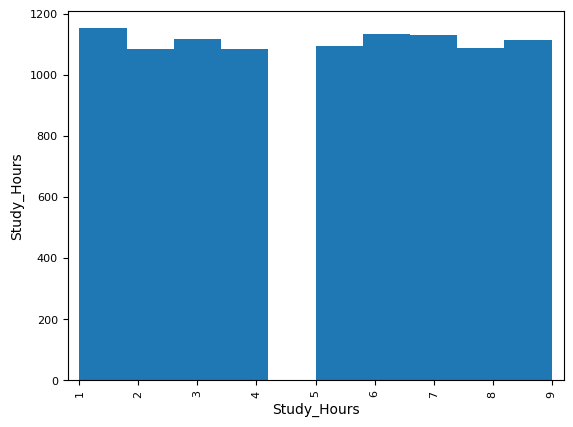

In [10]:
# 산점도 행렬 그리기 - 다중공선성 확인
X_ = X.iloc[:, 1:]
pd.plotting.scatter_matrix(X_)
plt.show()

2.3. (2.1)과 (2.2)의 분석을 비교하고 Study_Hours와 PI의 관계를 짧게, 자유롭게 설명해보세요.

회귀분석 결과를 통해 독립 변수들의 p-value를 확인하여 독립 변수가 종속 변수에 유의미한 영향을 끼치는지를 알 수 있습니다. p-value는 각 독립 변수의 t-test에 대한 유의확률로, 일반적으로 0.05보다 작으면 해당 독립 변수가 종속 변수에 유의미한 영향을 끼친다고 볼 수 있습니다.

2.1에서 'Study_Hours', 'Prev_Scores', 'Sleep_Hours', 'Sample_Practice', 'PI' 변수의 p-value가 모두 0.05보다 작으므로, 이 변수들은 종속 변수에 유의미한 영향을 끼친다고 할 수 있습니다. 그러나, condition number가 1.63e+03으로 매우 큰 것으로 나타났는데, 이는 다중공선성이 있다고 판단할 수 있습니다.

2.2에서 종속 변수 'PI'와 독립 변수 Study_Hours' 사이의 단순선형회귀분석 결과는 다음과 같습니다.

(1) R-squared : 0.140으로, Study_Hours는 PI의 변동성의 14%를 설명합니다.

(2) Study_Hours coef : 2.7731으로, Study_Hours가 1 단위 증가할 때 PI는 2.7731 증가합니다.

(3) p-value : 0.000으로 유의수준 0.05보다 작으므로 Study_Hours는 PI에 유의미한 영향을 끼친다고 할 수 있습니다.

(4) VIF or Condition Number : 12.5로, 10보다는 크지만 2.1의 그것(1.63e+03)보다는 작으므로 강한 상관관계가 존재하지 않는다고 해석할 수도 있습니다.

따라서 Study_Hours 변수는 PI에 유의미한 양의 영향을 미치는 것으로 나타납니다. 공부 시간이 증가할수록 PI가 증가하는 경향을 보입니다.